# Week 2: Program to display the summary and statistics of the sheet.
### By: Spandan Sahai (RA2311026010918)

Step 1 - Importing libraries, loading and viewing the dataset:

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cars_dataset = pd.read_csv("Cars Datasets 2025.csv", encoding="latin1")

print("\n=== Dataset Information ===")
cars_dataset.info()

cars_dataset['HorsePower_numeric'] = pd.to_numeric(cars_dataset['HorsePower'].str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['TotalSpeed_numeric'] = pd.to_numeric(cars_dataset['Total Speed'].str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['Performance_0_100_sec'] = pd.to_numeric(cars_dataset['Performance(0 - 100 )KM/H'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
cars_dataset['CC_Battery_numeric'] = pd.to_numeric(cars_dataset['CC/Battery Capacity'].str.replace(',', '').str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['Seats_numeric'] = pd.to_numeric(cars_dataset['Seats'], errors='coerce')
cars_dataset['Torque_numeric'] = pd.to_numeric(cars_dataset['Torque'].str.extract(r'(\d+)')[0], errors='coerce')

cars_dataset['CarsPrices_numeric'] = (
    cars_dataset['Cars Prices']
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace('/', '-', regex=False)
    .str.split('-').str[0]
    .str.strip()
)
cars_dataset['CarsPrices_numeric'] = pd.to_numeric(cars_dataset['CarsPrices_numeric'], errors='coerce')

numeric_cols = [
    'HorsePower_numeric', 'TotalSpeed_numeric', 'Performance_0_100_sec',
    'CC_Battery_numeric', 'Seats_numeric', 'Torque_numeric', 'CarsPrices_numeric'
]

numeric_df = cars_dataset[numeric_cols].dropna(how='all')


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


Step 2 - Finding mean

In [9]:
mean_values = numeric_df.mean()
print("\n=== Mean Values ===")
print(mean_values)


=== Mean Values ===
HorsePower_numeric          300.397373
TotalSpeed_numeric          216.467159
Performance_0_100_sec         7.563614
CC_Battery_numeric         2746.298434
Seats_numeric                 4.857380
Torque_numeric              425.949877
CarsPrices_numeric       137110.885408
dtype: float64


Step 3 - Finding variance

In [10]:
variance_values = numeric_df.var()
print("\n=== Variance Values ===")
print(variance_values)


=== Variance Values ===
HorsePower_numeric       4.811150e+04
TotalSpeed_numeric       2.814417e+03
Performance_0_100_sec    1.095619e+01
CC_Battery_numeric       3.748457e+06
Seats_numeric            2.260141e+00
Torque_numeric           8.445785e+04
CarsPrices_numeric       4.984583e+11
dtype: float64


Step 4: Finding correlation

In [11]:
correlation_values = numeric_df.corr()
print("\n=== Correlation Values ===")
print(correlation_values)


=== Correlation Values ===
                       HorsePower_numeric  TotalSpeed_numeric  \
HorsePower_numeric               1.000000            0.695005   
TotalSpeed_numeric               0.695005            1.000000   
Performance_0_100_sec           -0.619853           -0.784731   
CC_Battery_numeric               0.603342            0.337706   
Seats_numeric                   -0.241262           -0.393313   
Torque_numeric                   0.731909            0.436314   
CarsPrices_numeric               0.519683            0.389254   

                       Performance_0_100_sec  CC_Battery_numeric  \
HorsePower_numeric                 -0.619853            0.603342   
TotalSpeed_numeric                 -0.784731            0.337706   
Performance_0_100_sec               1.000000           -0.247467   
CC_Battery_numeric                 -0.247467            1.000000   
Seats_numeric                       0.192073           -0.116953   
Torque_numeric                     -0.39881

Step 5 - Finding correlation matrix

In [12]:
correlation_matrix = numeric_df.corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)


=== Correlation Matrix ===
                       HorsePower_numeric  TotalSpeed_numeric  \
HorsePower_numeric               1.000000            0.695005   
TotalSpeed_numeric               0.695005            1.000000   
Performance_0_100_sec           -0.619853           -0.784731   
CC_Battery_numeric               0.603342            0.337706   
Seats_numeric                   -0.241262           -0.393313   
Torque_numeric                   0.731909            0.436314   
CarsPrices_numeric               0.519683            0.389254   

                       Performance_0_100_sec  CC_Battery_numeric  \
HorsePower_numeric                 -0.619853            0.603342   
TotalSpeed_numeric                 -0.784731            0.337706   
Performance_0_100_sec               1.000000           -0.247467   
CC_Battery_numeric                 -0.247467            1.000000   
Seats_numeric                       0.192073           -0.116953   
Torque_numeric                     -0.39881

Step 6 - Finding covariance

In [13]:
covariance_values = numeric_df.cov()
print("\n=== Covariance Values ===")
print(covariance_values)


=== Covariance Values ===
                       HorsePower_numeric  TotalSpeed_numeric  \
HorsePower_numeric           4.811150e+04        8.087361e+03   
TotalSpeed_numeric           8.087361e+03        2.814417e+03   
Performance_0_100_sec       -4.505946e+02       -1.369667e+02   
CC_Battery_numeric           2.454100e+05        3.461088e+04   
Seats_numeric               -7.958766e+01       -3.123696e+01   
Torque_numeric               4.667058e+04        6.722773e+03   
CarsPrices_numeric           8.060024e+07        1.458687e+07   

                       Performance_0_100_sec  CC_Battery_numeric  \
HorsePower_numeric               -450.594634        2.454100e+05   
TotalSpeed_numeric               -136.966688        3.461088e+04   
Performance_0_100_sec              10.956189       -1.582357e+03   
CC_Battery_numeric              -1582.356634        3.748457e+06   
Seats_numeric                       0.909408       -3.340300e+02   
Torque_numeric                   -384.180205

Step 7 - Finding covariance heatmap

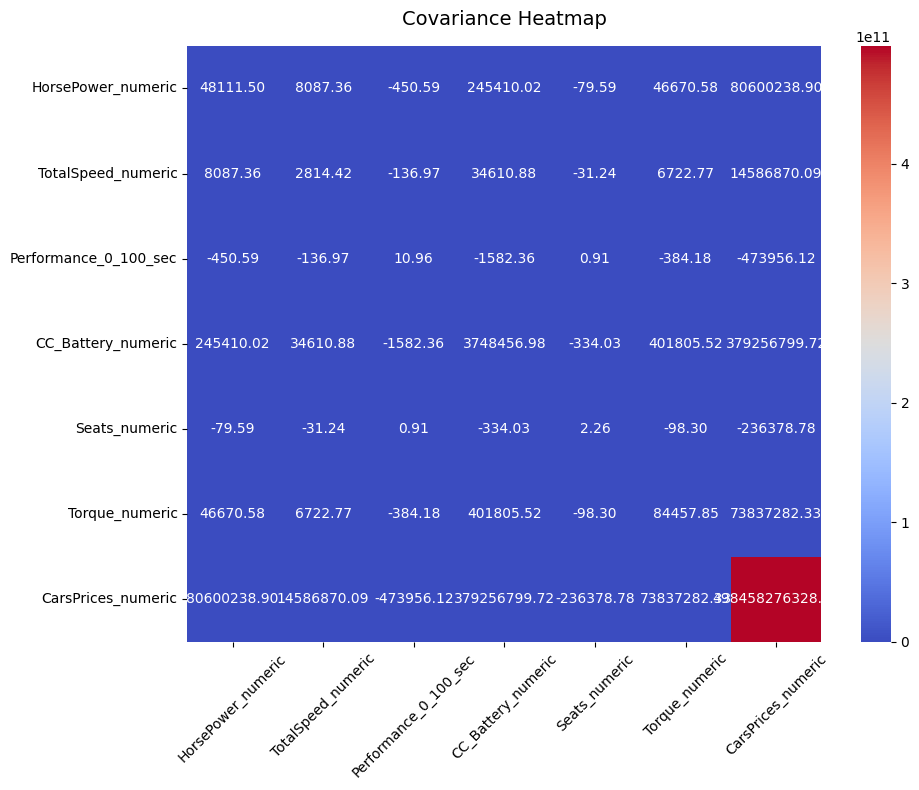

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_values, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Heatmap", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()